# 6 Regression Discontinuity

## 6.2.2 Continuity

In [2]:
# rdd_simulate1

In [29]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import statsmodels.api as sm

np.random.seed(12282020)

n = 1000
df = pd.DataFrame(index = range(n))
random_draws = np.random.normal(50, 25, n)
df['x'] = (random_draws > 0) * random_draws
df = df[df.x < 100]

df['D'] = 1 * (df.x > 50)

df['y1'] = 25 + 0*df.D + 1.5 * df.x + np.random.normal(0, 20, len(df))
df['y2'] = 25 + 40*df.D + 1.5 * df.x + np.random.normal(0, 20, len(df))
#print('"Counterfactual Potential Outcomes')


#p.ggplot(dat, p.aes(x='x', y='y1', color = 'factor(D)')) +    
#p.geom_point(alpha = 0.5) +    p.geom_vline(xintercept = 50, colour = "grey") +
#p.stat_smooth(method = "lm", se = 'F') +    p.labs(x = "Test score (X)", y = "Potential Outcome (Y1)")

In [30]:
def helper(D, ax, col = 'y1'):
    global df
    
    temp = df[df.D == D]
    marker = 'o'
    color = 'lightgray'
    
    if D > 0:
        marker = '^'
        color = 'black'
    ax.scatter(temp.x, temp[col], color = color, alpha = .95, marker = marker, edgecolor = 'black', s = 12)
    
    del temp
    
def reg_helper(D, col = 'y1'):
    global df
    temp = df[df.D == D]
    y = temp[col]
    temp['const'] = 1
    X = temp[['const', 'x']]
    

    model = sm.OLS(y, X).fit()
    
    return model.params

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


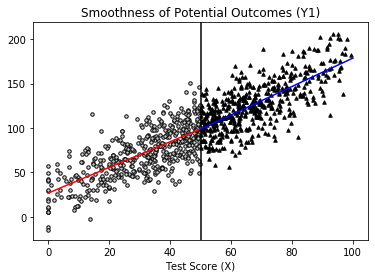

In [31]:
fig, ax = plt.subplots()
helper(0,ax)
helper(1,ax)
ax.axvline(50, ymin = 0, ymax = 1, color = 'black' )

ax.set_title("Smoothness of Potential Outcomes (Y1)")
ax.set_xlabel("Test Score (X)")

params = reg_helper(D = 0)
y = np.linspace(np.dot(np.array([1,0]),params), np.dot(np.array([1,50]),params),2)
ax.plot(np.linspace(0,50,2), y, color = 'red')

params = reg_helper(D = 1)
y = np.linspace(np.dot(np.array([1,50]),params), np.dot(np.array([1,100]),params),2)
ax.plot(np.linspace(50,100,2), y, color = 'blue')

fig.show()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


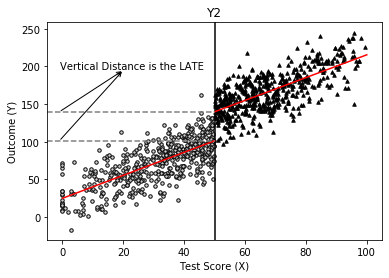

In [32]:
fig, ax = plt.subplots()
helper(0,ax, col = 'y2')
helper(1,ax, col = 'y2')
ax.axvline(50, ymin = 0, ymax = 1, color = 'black' )

ax.set_title("Smoothness of Potential Outcomes (Y1)")
ax.set_xlabel("Test Score (X)")

params = reg_helper(D = 0, col = 'y2')
y = np.linspace(np.dot(np.array([1,0]),params), np.dot(np.array([1,50]),params),2)
y1 = y[1]
ax.plot(np.linspace(0,50,2), y, color = 'red')

params = reg_helper(D = 1, col = 'y2')
y = np.linspace(np.dot(np.array([1,50]),params), np.dot(np.array([1,100]),params),2)
y2 = y[0]
ax.plot(np.linspace(50,100,2), y, color = 'red')

# add more stuff

ax.axhline(y2, 0, .5, linestyle = 'dashed', color = 'gray')
ax.axhline(y1, 0, .5, linestyle = 'dashed', color = 'gray')

ax.text(23, 200, s = 'Vertical Distance is the LATE', ha = 'center', va = 'center')
ax.annotate('', xy=(-1, y1), xytext=(20, 195),
            arrowprops=dict(facecolor='gray', arrowstyle = '<-'))
ax.annotate('', xy=(-1, y2), xytext=(20, 195),
            arrowprops=dict(facecolor='gray', arrowstyle = '<-'))

ax.set_ylabel('Outcome (Y)')
ax.set_xlabel("Test Score (X)")
ax.set_title("Y2")
plt.show()

## 6.2.3 Estimation using local and global least squares

In [161]:
# rdd_simulate3
np.random.seed(12282020)


obs = 1000
x = np.random.normal(100,50, obs)

df = pd.DataFrame({'const':np.ones(obs)})
df['x'] = x
df['x'] = df.x.apply(lambda x: max(0,x))

df['x2'], df['x3'] = df.x**2, df.x**3

In [162]:
df['D'] = 1*(df.x > 140)

In [163]:
# no effect from D, but nonlinear f(x)
df['y'] = 10000 + 0*df.D - 100*df.x + df.x2 + np.random.normal(0,1000,obs)
#df2 = df[df.x < 280]

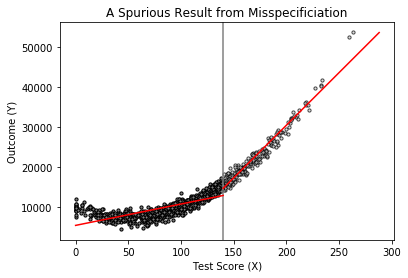

In [164]:
plt.axvline(140, color = 'gray')

# Above c_0
top = df[df.x > 140]

plt.scatter(top.x, top.y, edgecolor = 'black', color = 'lightgray', s = 10, alpha = 0.7) #, marker = 'o')
paramsD1 = sm.OLS(top.y, top[['x','const']]).fit().params
x_ = np.linspace(140,288,2)
plt.plot(x_, paramsD1['const'] + x_*paramsD1['x'], color = 'red')


# Below c_0
bottom = df[df.x <= 140]

plt.scatter(bottom.x, bottom.y, edgecolor = 'black', color = 'gray', s = 10) #, marker = 'o')
paramsD0 = sm.OLS(bottom.y, bottom[['x','const']]).fit().params
x_ = np.linspace(0,140,2)
plt.plot(x_, paramsD0['const'] + x_*paramsD0['x'], color = 'red')


plt.xlabel("Test Score (X)")
plt.ylabel("Outcome (Y)")
plt.title("A Spurious Result from Misspecificiation")

plt.show()

In [170]:
reg = sm.OLS(df['y'], df[['D','const','x']]).fit()
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     2201.
Date:                Mon, 21 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:33:06   Log-Likelihood:                -9318.0
No. Observations:                1000   AIC:                         1.864e+04
Df Residuals:                     997   BIC:                         1.866e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
D           6109.7445    302.135     20.222      0.0

In [171]:
LATE = np.dot(paramsD1.values, np.array([140,1])) - np.dot(paramsD0.values, np.array([140,1]))
print(LATE)

1769.838907061163


### Higher-Order Polynomials

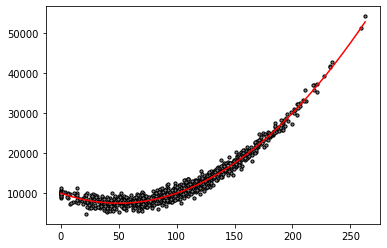

In [152]:
# rdd_simulated4

# overwrite y from before
df['y'] = 10000 + 0*df.D - 100*df.x + df.x2 + np.random.normal(0,1000,obs)

plt.scatter(df.x, df.y, color = 'gray', edgecolor = 'black', s = 10)
x_ = np.linspace(0,df.x.max(),301)
plt.plot(x_, -100*x_ + x_**2 + 10000, color = 'red')

In [177]:
# interactions

for power in range(1,4):
    
    df['Dx'+str(power)] = df['D'] * df['x']**power


reg_all = sm.OLS(df.y, df[['const','D','x', 'x2','x3', 'Dx1','Dx2','Dx3']]).fit()
reg_quad = sm.OLS(df.y, df[['const','D','x', 'x2']]).fit()

In [179]:
print(reg_quad.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                 1.312e+04
Date:                Mon, 21 Jun 2021   Prob (F-statistic):               0.00
Time:                        13:38:54   Log-Likelihood:                -8311.7
No. Observations:                1000   AIC:                         1.663e+04
Df Residuals:                     996   BIC:                         1.665e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9757.7082    114.385     85.306      0.0

## 6.2.4 Nonparametric kernels